In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'd:\\study\\graduation project\\GP-2025-Strain\\Code\\Data_scripts'

In [3]:
# Define the base directory path
# base_dir = "Data/ACDC/database"
base_dir = "D:\study\graduation project\ACDC\database" #Relative path to the database folder
training_dir = os.path.join(base_dir, "training")
testing_dir = os.path.join(base_dir, "testing")

In [4]:
# Function to parse .cfg file and extract features
def parse_cfg_file(cfg_file_path):
    features = {}
    
    # Read the .cfg file line by line and extract the relevant information
    with open(cfg_file_path, 'r') as file:
        for line in file:
            key, value = line.split(':')
            key = key.strip()
            value = value.strip()
            features[key] = value
    
    return features

# Function to check for files in patient folders
def check_patient_files(base_path):
    patient_data = []
    
    # List the subdirectories (patients) in the base path
    for folder in os.listdir(base_path):
        patient_dir = os.path.join(base_path, folder)
        
        # Ensure it is a directory (patient folder)
        if os.path.isdir(patient_dir):
            # Get the list of files in the patient directory
            patient_files = os.listdir(patient_dir)
            
            # Check for 4D and cfg files
            has_4d_file = any(f.endswith('_4d.nii') for f in patient_files)
            cfg_file = next((f for f in patient_files if f.endswith('.cfg')), None)
            
            if cfg_file:
                cfg_file_path = os.path.join(patient_dir, cfg_file)
                # Parse the .cfg file
                cfg_data = parse_cfg_file(cfg_file_path)
                
                # Prepare the data row
                row = {
                    'Patient': folder,
                    'ED': cfg_data.get('ED'),
                    'ES': cfg_data.get('ES'),
                    'Group': cfg_data.get('Group'),
                    'Height': float(cfg_data.get('Height', 0)),
                    'NbFrame': int(cfg_data.get('NbFrame', 0)),
                    'Weight': float(cfg_data.get('Weight', 0)),
                    'Has_4D_File': 'Yes' if has_4d_file else 'No'
                }
                
                # Add the row to patient_data list
                patient_data.append(row)
            else:
                row = {
                    'Patient': folder,
                    'ED': None,
                    'ES': None,
                    'Group': None,
                    'Height': None,
                    'NbFrame': None,
                    'Weight': None,
                    'Has_4D_File': 'Yes' if has_4d_file else 'No'
                }
    
    # Create a DataFrame from the collected patient data
    df = pd.DataFrame(patient_data)
    return df

# Call the function and create the DataFrame
df_training_patients = check_patient_files(training_dir)
df_testing_patients = check_patient_files(testing_dir)

In [5]:
df_training_patients.head()

,Patient,ED,ES,Group,Height,NbFrame,Weight,Has_4D_File
0,patient001,1,12,DCM,184.0,30,95.0,No
1,patient002,1,12,DCM,160.0,30,70.0,No
2,patient003,1,15,DCM,165.0,30,77.0,No
3,patient004,1,15,DCM,159.0,28,46.0,No
4,patient005,1,13,DCM,165.0,30,77.0,No


In [6]:
df_testing_patients.head()

,Patient,ED,ES,Group,Height,NbFrame,Weight,Has_4D_File
0,patient101,1,14,DCM,169.0,30,79.0,Yes
1,patient102,1,13,NOR,156.0,30,75.0,Yes
2,patient103,1,11,MINF,175.0,30,107.0,Yes
3,patient104,1,11,HCM,180.0,30,74.0,Yes
4,patient105,1,10,HCM,173.0,30,84.0,Yes


In [7]:
# List of DataFrames
dataframes = {'Training': df_training_patients, 'Testing': df_testing_patients}

# Descriptive statistics and group counts for each DataFrame
for name, df in dataframes.items():
    print(f"=== {name} DataFrame Descriptive Statistics ===")
    print(df.describe())
    print(f"\n=== {name} DataFrame Group Counts ===")
    print(df['Group'].value_counts(), "\n")

=== Training DataFrame Descriptive Statistics ===
           Height     NbFrame      Weight
count  100.000000  100.000000  100.000000
mean   170.840000   26.980000   74.960000
std      9.710683    6.078576   16.632037
min    140.000000   12.000000   35.000000
25%    165.000000   25.000000   62.750000
50%    171.500000   30.000000   75.000000
75%    178.000000   30.000000   85.000000
max    192.000000   35.000000  123.000000

=== Training DataFrame Group Counts ===
Group
DCM     20
HCM     20
MINF    20
NOR     20
RV      20
Name: count, dtype: int64 

=== Testing DataFrame Descriptive Statistics ===
           Height    NbFrame      Weight
count   50.000000  50.000000   50.000000
mean   170.000000  25.480000   80.700000
std      9.508321   6.713495   21.978886
min    137.000000  14.000000   35.000000
25%    165.000000  19.000000   68.500000
50%    170.000000  30.000000   80.000000
75%    175.000000  30.000000   90.750000
max    185.000000  35.000000  172.000000

=== Testing DataFrame G

=== Training DataFrame Pie Chart ===


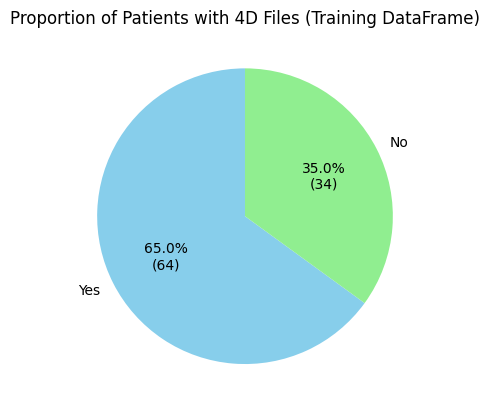

=== Testing DataFrame Pie Chart ===


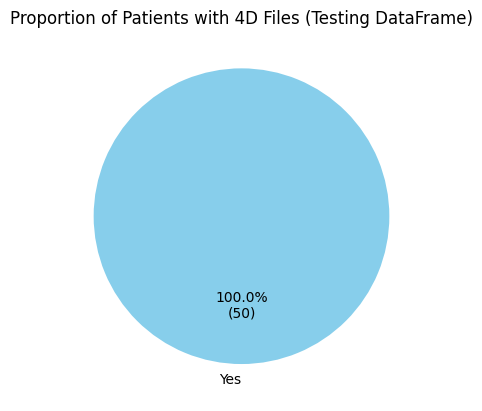

In [8]:
for name, df in dataframes.items():
    print(f"=== {name} DataFrame Pie Chart ===")
    
    # Get the counts for 'Has_4D_File'
    has_4d_counts = df['Has_4D_File'].value_counts()
    def format_func(pct, allvalues):
        absolute = int(pct / 100. * sum(allvalues))
        return f"{pct:.1f}%\n({absolute})"
    
    # Plot
    has_4d_counts.plot.pie(
        autopct=lambda pct: format_func(pct, has_4d_counts),
        startangle=90,
        colors=['skyblue', 'lightgreen']
    )
    
    plt.title(f'Proportion of Patients with 4D Files ({name} DataFrame)')
    plt.ylabel('')
    plt.show()

=== Training DataFrame: Histogram with KDE for NbFrame ===


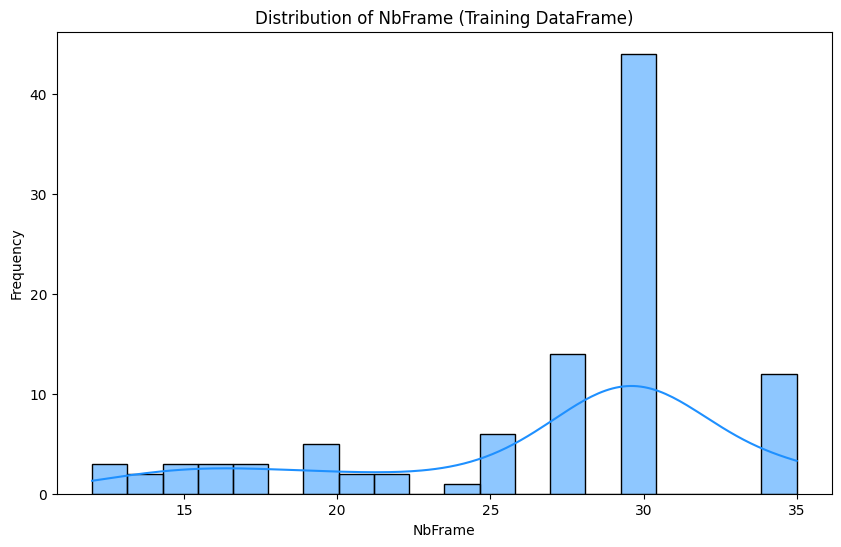

=== Testing DataFrame: Histogram with KDE for NbFrame ===


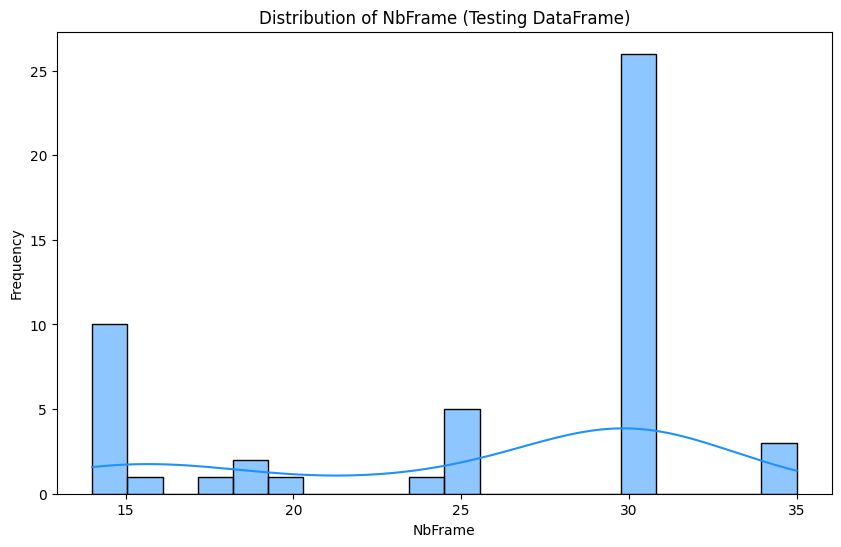

In [9]:
for name, df in dataframes.items():
    print(f"=== {name} DataFrame: Histogram with KDE for NbFrame ===")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['NbFrame'], kde=True, bins=20, color='dodgerblue')
    plt.title(f'Distribution of NbFrame ({name} DataFrame)')
    plt.xlabel('NbFrame')
    plt.ylabel('Frequency')
    plt.show()

=== Training DataFrame: Swarm Plot of NbFrame by Group ===


C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_5420\4062077285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Group', y='NbFrame', data=df, palette='Set1')


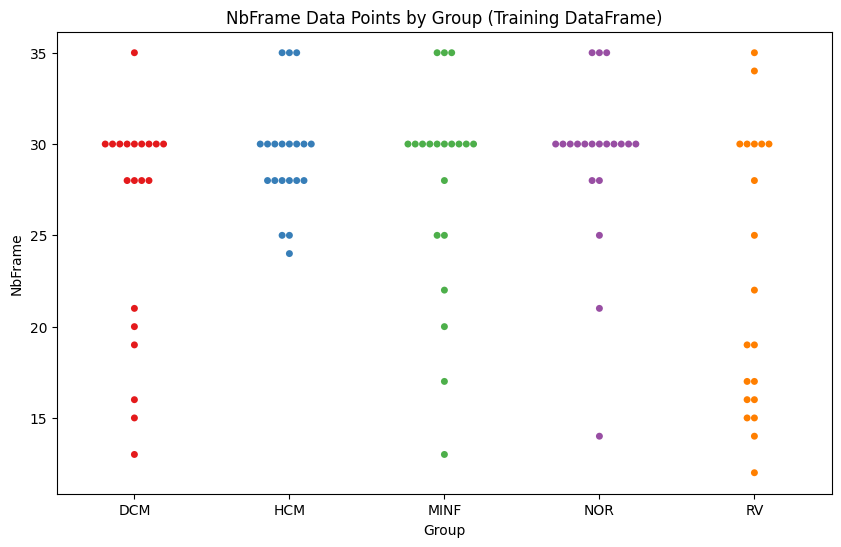

=== Testing DataFrame: Swarm Plot of NbFrame by Group ===


C:\Users\Kimo Store\AppData\Local\Temp\ipykernel_5420\4062077285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Group', y='NbFrame', data=df, palette='Set1')


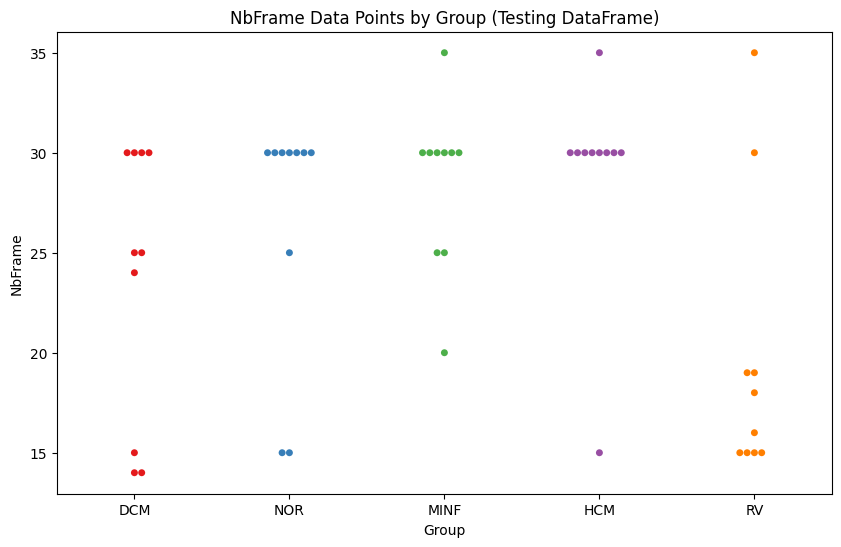

In [10]:
for name, df in dataframes.items():
    print(f"=== {name} DataFrame: Swarm Plot of NbFrame by Group ===")
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x='Group', y='NbFrame', data=df, palette='Set1')
    plt.title(f'NbFrame Data Points by Group ({name} DataFrame)')
    plt.xlabel('Group')
    plt.ylabel('NbFrame')
    plt.show()

=== Training DataFrame Histograms ===


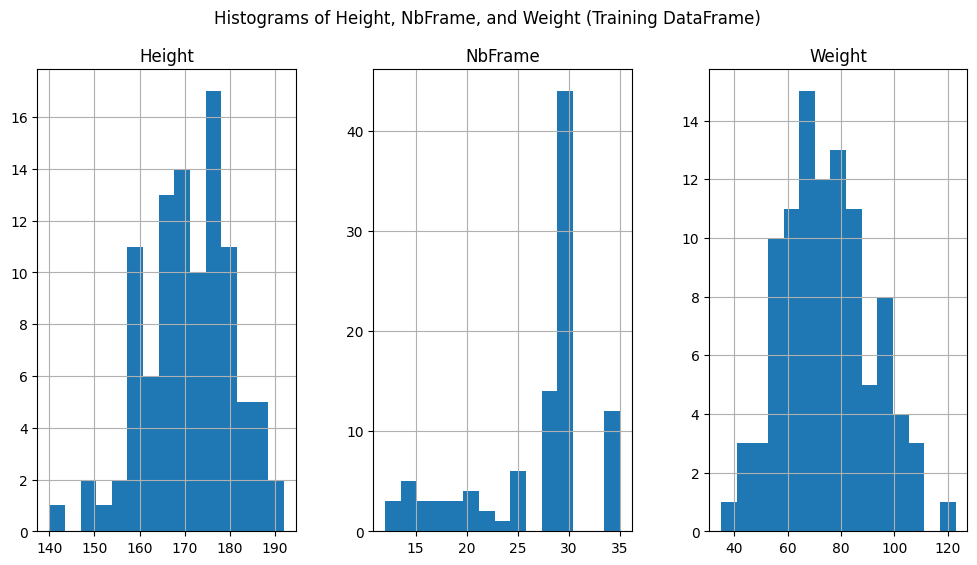

=== Testing DataFrame Histograms ===


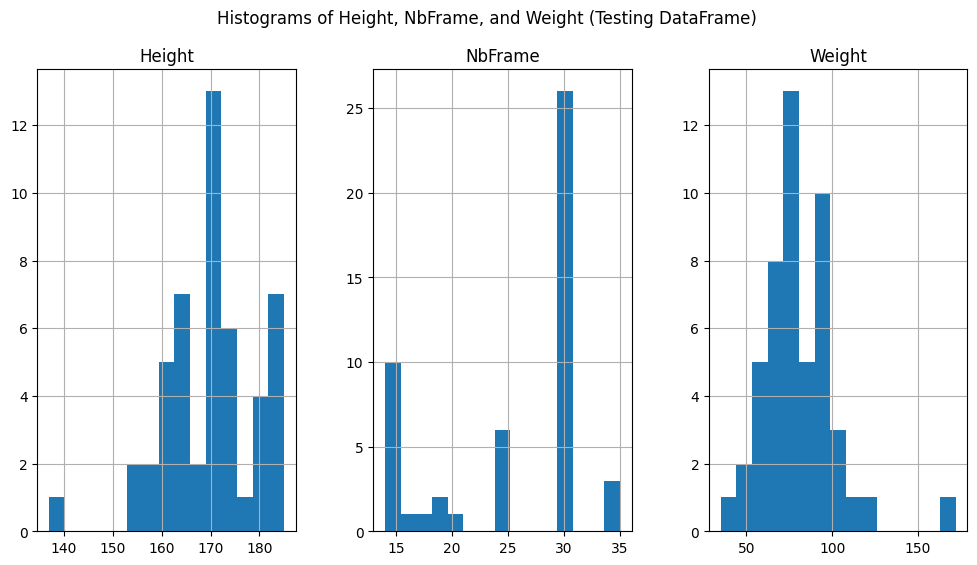

In [11]:
for name, df in dataframes.items():
    print(f"=== {name} DataFrame Histograms ===")
    numerical_columns = ['Height', 'NbFrame', 'Weight']
    df[numerical_columns].hist(bins=15, figsize=(12, 6), layout=(1, 3))
    plt.suptitle(f'Histograms of Height, NbFrame, and Weight ({name} DataFrame)')
    plt.show()

=== Training DataFrame Boxplots ===


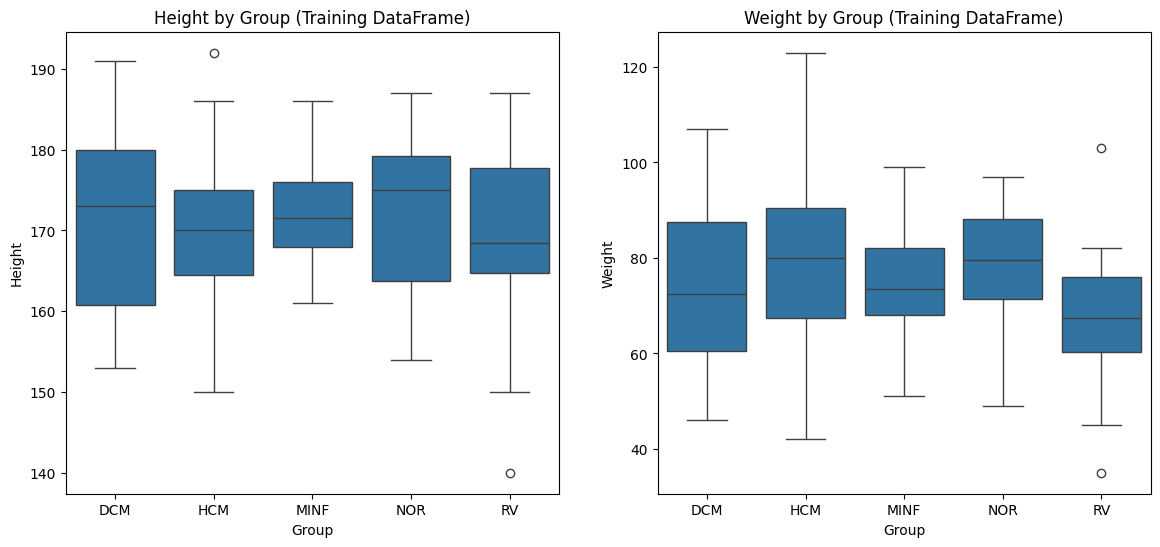

=== Testing DataFrame Boxplots ===


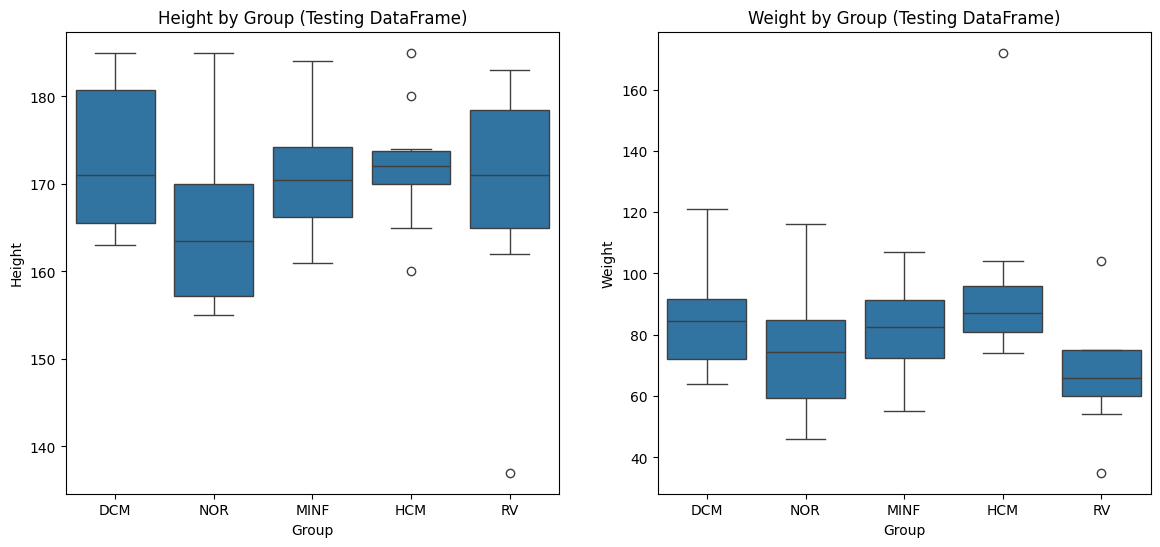

In [12]:
for name, df in dataframes.items():
    print(f"=== {name} DataFrame Boxplots ===")
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(x='Group', y='Height', data=df, ax=axes[0])
    axes[0].set_title(f'Height by Group ({name} DataFrame)')
    sns.boxplot(x='Group', y='Weight', data=df, ax=axes[1])
    axes[1].set_title(f'Weight by Group ({name} DataFrame)')
    plt.show()

=== Training DataFrame Scatter Plot ===


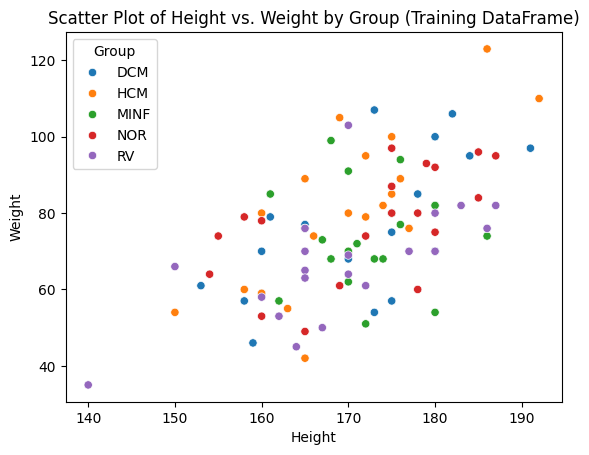

=== Testing DataFrame Scatter Plot ===


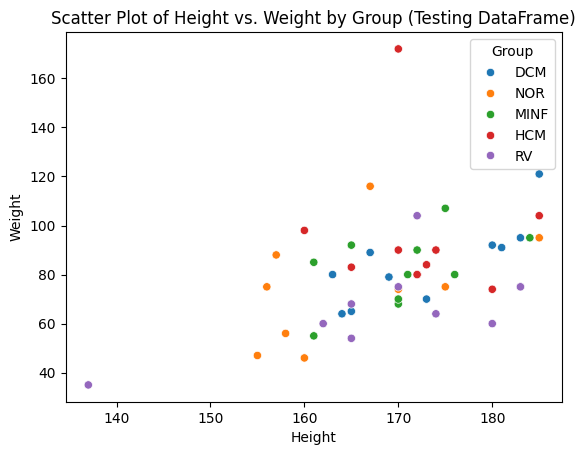

In [13]:
for name, df in dataframes.items():
    print(f"=== {name} DataFrame Scatter Plot ===")
    sns.scatterplot(x='Height', y='Weight', hue='Group', data=df)
    plt.title(f'Scatter Plot of Height vs. Weight by Group ({name} DataFrame)')
    plt.show()